In [1]:

import numpy as np
from scipy.optimize import curve_fit, least_squares
import matplotlib.pyplot as plt

def sqrt_residuals(a, *args):
    a_ = a[0]
    # b_ = a[1]
    x = args[0]
    y = args[1]
    tmp_fit = a_ * np.sqrt(x)
    # tmp_fit = a_ * np.sqrt(x) + b_
    diff = tmp_fit - y
    return np.sqrt(np.dot(diff, diff))

def power_residuals(a, *args):
    a_ = a[0]
    b_ = a[1]
    # c_ = a[2]
    x = args[0]
    y = args[1]
    tmp_fit = a_ * np.power(x, b_)
    # tmp_fit = a_ * np.power(x, b_) + c_
    diff = tmp_fit - y
    return np.sqrt(np.dot(diff, diff))

def linear_residuals(a, *args):
    a_ = a[0]
    # b_ = a[1]
    x = args[0]
    y = args[1]
    tmp_fit = a_ * x
    # tmp_fit = a_ * x + b_
    diff = tmp_fit - y
    return np.sqrt(np.dot(diff, diff))

def total_residuals(x, y):
    #diff = x - y
    # return np.sqrt(np.dot(diff, diff))
    return np.sqrt(np.dot(y, y))

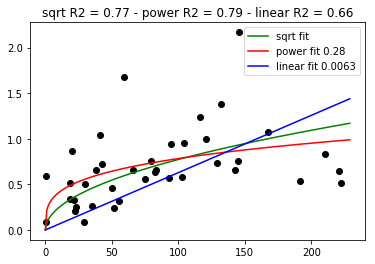

In [2]:
syllable_aligned_fname = r'Z:\Robert\PolychronousProject\Figures_V12\Figure1\sequence_variability\Variability_SyllableAligned.csv'
syllable_aligned_data = np.loadtxt(syllable_aligned_fname, skiprows=1, unpack=True, delimiter=',')

# sqrt_fit = least_squares(sqrt_residuals, (1.0, 0.1), max_nfev=1e4, args=(syllable_aligned_data[0], syllable_aligned_data[2]))
# power_fit = least_squares(power_residuals, (1.0, 1.0, 0.1), max_nfev=1e4, args=(syllable_aligned_data[0], syllable_aligned_data[2]))
# linear_fit = least_squares(linear_residuals, (1.0, 0.1), max_nfev=1e5, args=(syllable_aligned_data[0], syllable_aligned_data[2]))
sqrt_fit = least_squares(sqrt_residuals, (1.0,), max_nfev=1e4, args=(syllable_aligned_data[0], syllable_aligned_data[2]))
power_fit = least_squares(power_residuals, (1.0, 1.0), max_nfev=1e4, args=(syllable_aligned_data[0], syllable_aligned_data[2]))
linear_fit = least_squares(linear_residuals, (1.0,), max_nfev=1e5, args=(syllable_aligned_data[0], syllable_aligned_data[2]))
total_res = total_residuals(syllable_aligned_data[0], syllable_aligned_data[2])

sqrt_fit_rsquared = 1.0 - (sqrt_fit.fun / total_res) ** 2
power_fit_rsquared = 1.0 - (power_fit.fun / total_res) ** 2
linear_fit_rsquared = 1.0 - (linear_fit.fun / total_res) ** 2

fig1 = plt.figure(1)
ax1 = fig1.add_subplot(1, 1, 1)
ax1.plot(syllable_aligned_data[0], syllable_aligned_data[2], 'ko')
x_fit_plot = np.arange(0, 230, 1.0)
# ax1.plot(x_fit_plot, sqrt_fit.x[0] * np.sqrt(x_fit_plot) + sqrt_fit.x[1], 'g-', label='sqrt fit')
ax1.plot(x_fit_plot, sqrt_fit.x[0] * np.sqrt(x_fit_plot), 'g-', label='sqrt fit')
power_label_str = 'power fit %.2f' % power_fit.x[1]
# ax1.plot(x_fit_plot, power_fit.x[0] * np.power(x_fit_plot, power_fit.x[1]) + power_fit.x[2], 'r-', label=power_label_str)
ax1.plot(x_fit_plot, power_fit.x[0] * np.power(x_fit_plot, power_fit.x[1]), 'r-', label=power_label_str)
# linear_label_str = 'linear fit %.4f, %.2f' % (linear_fit.x[0], linear_fit.x[1])
linear_label_str = 'linear fit %.4f' % (linear_fit.x[0])
# ax1.plot(x_fit_plot, linear_fit.x[0] * x_fit_plot + linear_fit.x[1], 'b-', label=linear_label_str)
ax1.plot(x_fit_plot, linear_fit.x[0] * x_fit_plot, 'b-', label=linear_label_str)
title_str = 'sqrt R2 = %.2f - power R2 = %.2f - linear R2 = %.2f' % (sqrt_fit_rsquared, power_fit_rsquared, linear_fit_rsquared)
ax1.set_title(title_str)
plt.legend()
out_name = r'Z:\Robert\PolychronousProject\Figures_V12\Figure1\sequence_variability\syllable_var_fit.pdf'
plt.savefig(out_name)
plt.show()

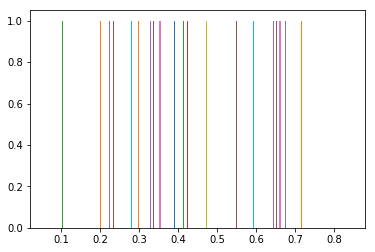

0.454463589331


In [5]:
syllable_shuffled_fname = r'Z:\Robert\PolychronousProject\Figures_V12\Figure1\sequence_variability\Variability_SyllableAligned_Shuffled.csv'
syllable_shuffled_data = np.loadtxt(syllable_shuffled_fname, skiprows=1, unpack=True, delimiter=',')

# fig2 = plt.figure(2)
# ax2 = fig2.add_subplot(1, 1, 1)
n_shuffles = 1000
shuffled_residuals = []
for i in range(n_shuffles):
    sel = np.where(syllable_shuffled_data[2] == i)
    burst_times = syllable_shuffled_data[0][sel]
    burst_vars = syllable_shuffled_data[1][sel]
    # sqrt_fit_shuffle = least_squares(sqrt_residuals, (1.0, 0.1), max_nfev=1e4, args=(burst_times, burst_vars))
    sqrt_fit_shuffle = least_squares(sqrt_residuals, (1.0,), max_nfev=1e4, args=(burst_times, burst_vars))
    shuffled_res = total_residuals(burst_times, burst_vars)
    shuffled_rsquared = 1.0 - (sqrt_fit_shuffle.fun / shuffled_res) ** 2
    shuffled_residuals.append(shuffled_rsquared)
    # ax2.plot(burst_times, burst_vars, 'ko')
    # ax2.plot(x_fit_plot, sqrt_fit_shuffle.x[0] * np.sqrt(x_fit_plot) + sqrt_fit_shuffle.x[1], 'g-')

fig3 = plt.figure(3)
ax3 = fig3.add_subplot(1, 1, 1)
ax3.hist(shuffled_residuals)
plt.show()
print np.mean(shuffled_residuals)

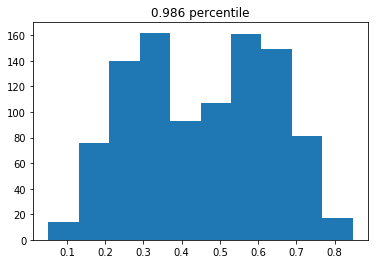

In [8]:
shuffled_residuals2 = np.array(shuffled_residuals)
shuffled_residuals2.flatten()
data_percentile = np.sum(shuffled_residuals2 < sqrt_fit_rsquared) / 1000.0
fig4 = plt.figure(4)
ax4 = fig4.add_subplot(1, 1, 1)
ax4.hist(shuffled_residuals2)
out_name2 = r'Z:\Robert\PolychronousProject\Figures_V12\Figure1\sequence_variability\syllable_var_shuffled_fit_R2.pdf'
plt.title('%.3f percentile' % data_percentile)
plt.savefig(out_name2)
plt.show()
